<a href="https://colab.research.google.com/github/raghavendra-1999/worklog/blob/master/day(09_07_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### load the MNIST dataset

In [ ]:
from keras .datasets.mnist import load_data

Using TensorFlow backend.


In [ ]:
## load data--return value is two tuples train,test
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [ ]:
print(test_digits.shape)

(10000, 28, 28)


In [ ]:
print(train_labels.shape)

(60000,)


In [ ]:
print(test_labels.shape)

(10000,)


In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
import pandas as pd
pd.Series(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [ ]:
pd.Series(test_labels).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

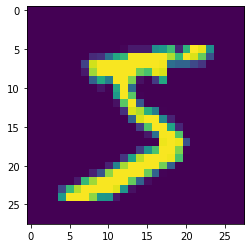

In [ ]:
plt.imshow(train_digits[0])

Text(0.5, 1.0, 'DIGIT 5')

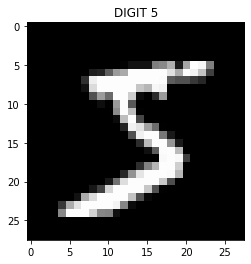

In [ ]:
plt.imshow(train_digits[0],cmap="gray")
plt.title("DIGIT "+ str(train_labels[0]))


(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

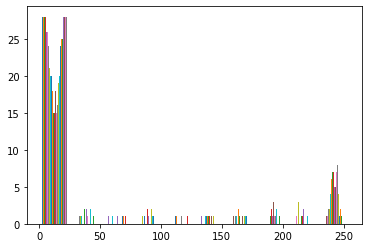

In [ ]:
plt.hist(train_digits[0])

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

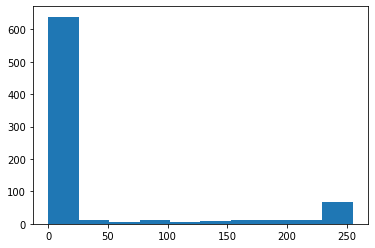

In [ ]:
plt.hist(train_digits[0].flat)

(array([[28.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [28.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  0.,  0., ...,  0.,  0.,  0.],
        [28.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105.,

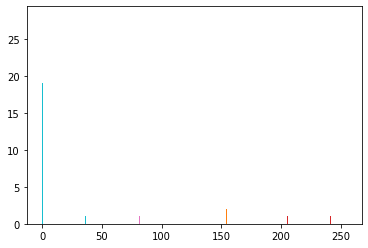

In [ ]:
plt.hist(train_digits[0],bins=255)

In [ ]:
plt.hist(train_digits[14].flat)


(array([713.,  17.,   1.,   2.,  10.,   0.,   4.,   4.,   2.,  31.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

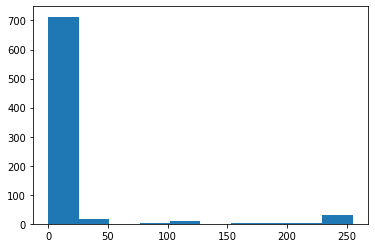

In [ ]:
plt.hist(train_digits[14].flat)


In [ ]:
train_labels[10:20]

array([3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=uint8)

In [ ]:
samples=np.random.randint(train_digits.shape[0],size=16)
samples

array([22062, 53825,  3087, 14351, 53093, 20745, 22693,  2421, 52444,
       27323, 49822, 35377, 43183,   910, 50290, 14756])

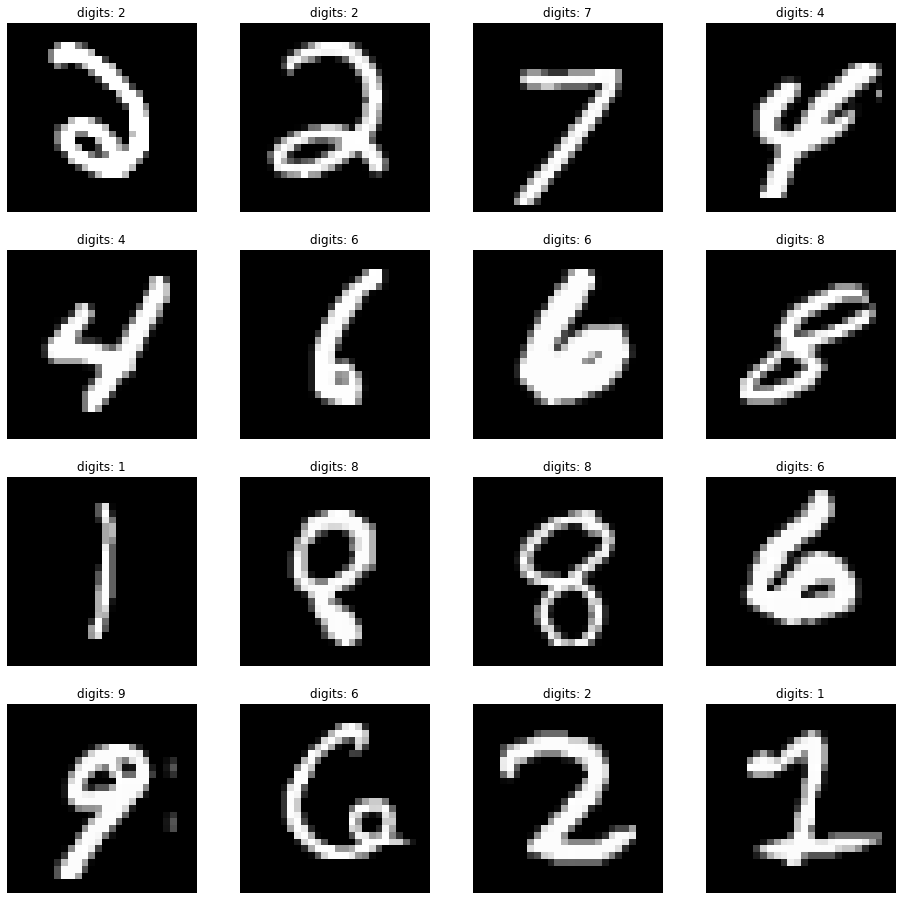

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i],cmap='gray')
  plt.title("digits: "+str(train_labels[i]))
  plt.axis("off")
  j+=1

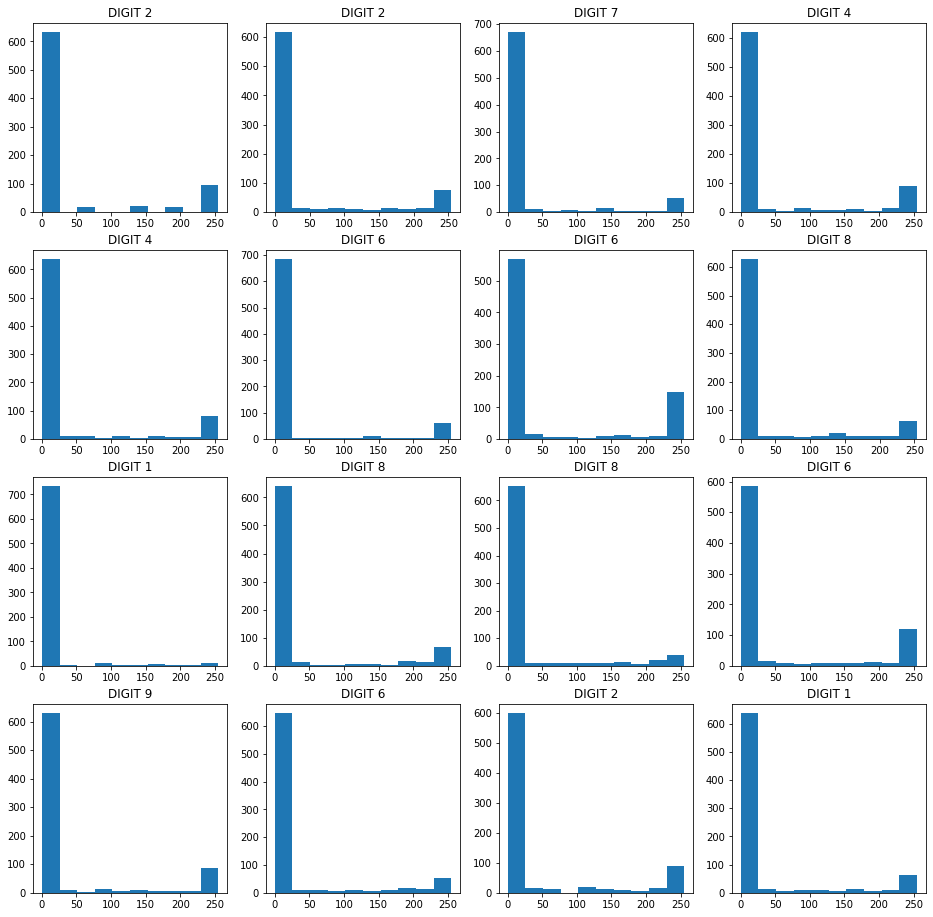

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in samples:
  plt.subplot(4,4,j)
  plt.hist(train_digits[i].flat)
  plt.title("DIGIT "+ str(train_labels[i]))
  j += 1

In [ ]:
train_digits_sc=train_digits/225.0
test_digits_sc=test_digits/225.0

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_labels_cat=to_categorical(train_labels)

In [ ]:
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
train_labels_cat=to_categorical(test_labels)
train_labels_cat[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

split the train data to train and validation

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(train_digits,train_labels,test_size=0.1,random_state=1)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000,)


Build and train the model

## Bulid the Model

In [ ]:
## import the methods required
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [ ]:
# We are creating base model
model = Sequential()
# first layer
model.add(Flatten(input_shape=(28,28)))#flattens i/p to 1d array
# dense layeruyiuiugiygiyg
model.add(Dense(128,activation='relu'))# no need to mention shape as previous layer o/p is i/p here
model.add(Dense(128,activation='relu'))# no need to mention shape as previous layer o/p is i/p here
model.add(Dense(64,activation='relu'))# no need to mention shape as previous layer o/p is i/p here
model.add(Dense(256,activation='relu'))# no need to mention shape as previous layer o/p is i/p here